In [1]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
import warnings
from imblearn.over_sampling import SMOTE

In [2]:
#Load File
data = pd.read_csv("E:/simplilearn_notes_vidoes/pg_data_science_courses/courses/Capstone Projects/Healthcare PGP/Project 2/Healthcare - Diabetes/health care diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#shape
data.shape

(768, 9)

In [4]:
#dtypes
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


Data Exploration:

1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

Glucose

BloodPressure

SkinThickness

Insulin

BMI

In [5]:
data.loc[:,['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578
std,31.972618,19.355807,15.952218,115.244002,7.884160
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000
50%,117.000000,72.000000,23.000000,30.500000,32.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000
max,199.000000,122.000000,99.000000,846.000000,67.100000


In [6]:
data_type=data.copy(deep=True)
columns=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columns:
    data[col]=data[col].replace(0, np.nan)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


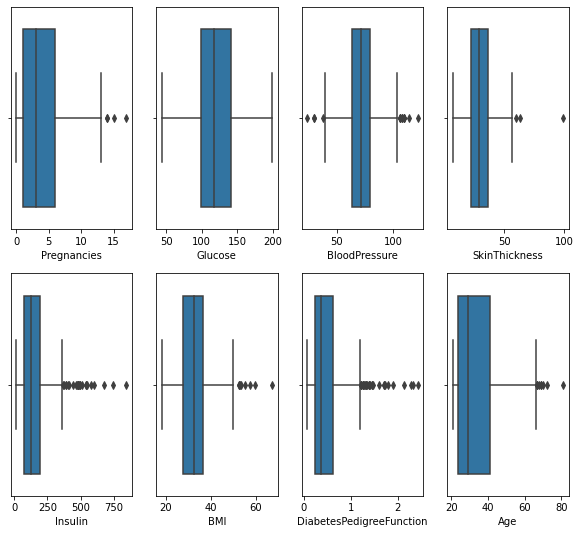

In [7]:
#Detecting outliers
fig, ax = plt.subplots(2,4,figsize=(10,9))
j=0
k=0
for i, col in enumerate(data.drop(['Outcome'], axis=1).columns):
    if i<=3:
        warnings.filterwarnings('ignore')
        sbn.boxplot(data[col], ax=ax[j,i])
    else:
        warnings.filterwarnings('ignore')
        sbn.boxplot(data[col], ax=ax[j+1,k])
        k+=1
plt.show()

In [8]:
#Handling Outliers
data_new = data.copy()
for col in data_new.drop(['Outcome'], axis=1).columns:
        Q1 = data_new[col].quantile(0.25)
        Q3 = data_new[col].quantile(0.75)
        IQR = Q3-Q1
        upper_lim = Q3+(IQR*1.5)
        lower_lim = Q1-(IQR*1.5)
        data_new[col]=np.where(data_new[col]<lower_lim, lower_lim, np.where(data_new[col]>upper_lim, upper_lim, data_new[col]))        

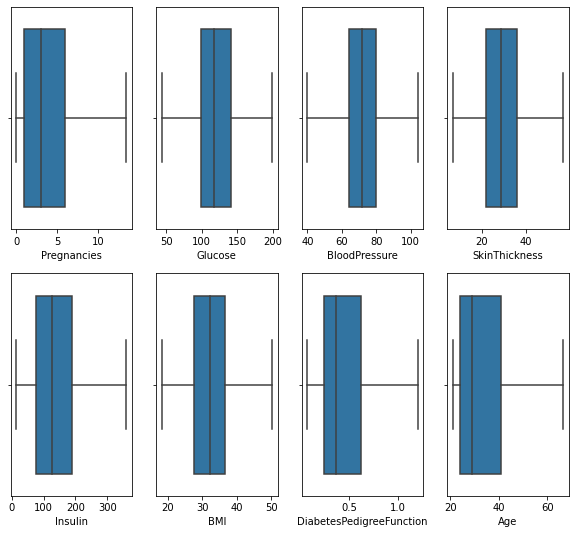

In [9]:
#After Hnadling outliers
fig, ax = plt.subplots(2,4,figsize=(10,9))
j=0
k=0
for i, col in enumerate(data_new.drop(['Outcome'], axis=1).columns):
    if i<=3:
        warnings.filterwarnings('ignore')
        sbn.boxplot(data_new[col], ax=ax[j,i])
    else:
        warnings.filterwarnings('ignore')
        sbn.boxplot(data_new[col], ax=ax[j+1,k])
        k+=1
plt.show()

2. Visually explore these variables using histograms. Treat the missing values accordingly.

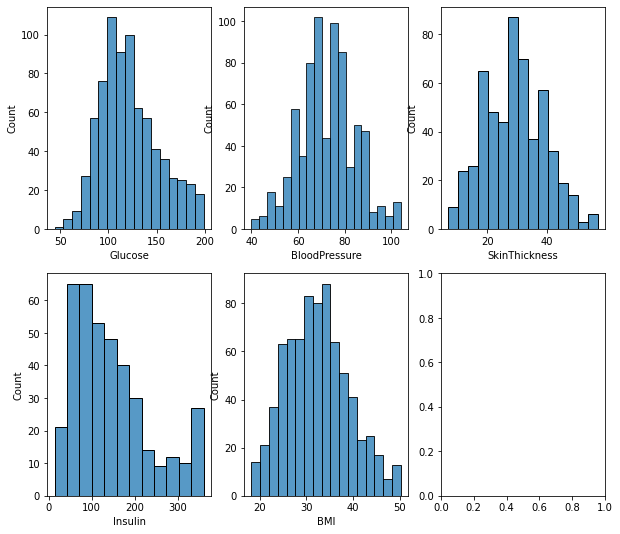

In [10]:
columns=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
fig, ax = plt.subplots(2,3, figsize=(10,9))
r=0
for i, col in enumerate(columns):
    if i > 2:
        r=1
        sbn.histplot(data_new[col], ax=ax[r][i-3])
    else:
        sbn.histplot(data_new[col], ax=ax[r][i])
plt.show()

In [11]:
import numpy as np
from fancyimpute import KNN

In [12]:
data_new.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31.0,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1


In [13]:
#Detecting missing values
data_new.isna().sum(axis=0)

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [14]:
#in percentage
(data_new.isna().sum(axis=0)/len(data))*100

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

Since 29% of data misssing in SkinThickness and 49% of data is missing Insulin. So I drop those two columns

In [15]:
impute = KNN(k=5)
data_impute = pd.DataFrame(impute.fit_transform(data_new.drop(['SkinThickness', 'Insulin', 'Outcome'], axis=1)))
data_impute.columns=['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age']
data_impute['Outcome']=data_new['Outcome']
data_impute

Imputing row 1/768 with 0 missing, elapsed time: 0.225
Imputing row 101/768 with 0 missing, elapsed time: 0.227
Imputing row 201/768 with 0 missing, elapsed time: 0.228
Imputing row 301/768 with 1 missing, elapsed time: 0.229
Imputing row 401/768 with 0 missing, elapsed time: 0.231
Imputing row 501/768 with 0 missing, elapsed time: 0.232
Imputing row 601/768 with 0 missing, elapsed time: 0.234
Imputing row 701/768 with 0 missing, elapsed time: 0.236


,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,43.1,1.200,33.0,1
...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,32.9,0.171,63.0,0
764,2.0,122.0,70.0,36.8,0.340,27.0,0
765,5.0,121.0,72.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,30.1,0.349,47.0,1


In [16]:
#in percentage
(data_impute.isna().sum(axis=0)/len(data))*100

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables.

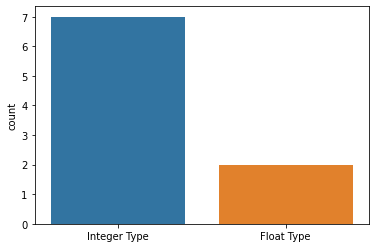

In [17]:
datatype=[]
for col in data.columns:
    if data_type[col].dtypes=='int64':
        datatype.append('Integer Type') 
    elif data_type[col].dtypes=='float64':
        datatype.append('Float Type')
warnings.filterwarnings('ignore')
sbn.countplot(datatype)
plt.show()

In [18]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Data Exploration:

4. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

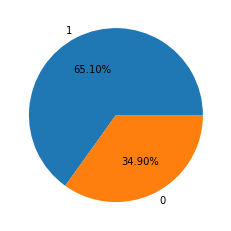

In [19]:
plt.pie(data.Outcome.value_counts(), labels=data.Outcome.unique(), autopct='%.2f%%')
plt.show()

data is imbalanced. Need to tune the parameter weight as balanced in model.

5. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

<Figure size 720x648 with 0 Axes>

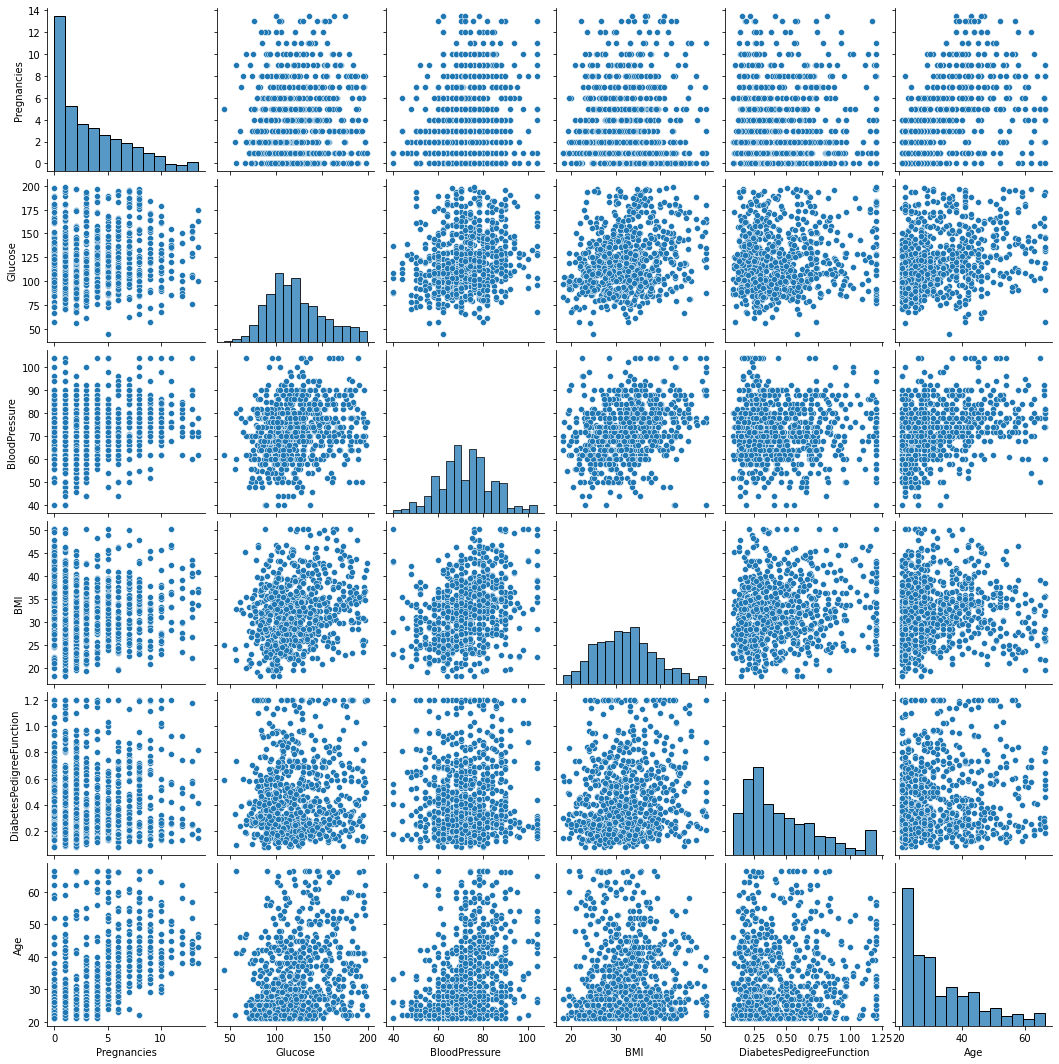

In [20]:
plt.figure(figsize=(10,9))
sbn.pairplot(data_impute.drop(['Outcome'], axis=1))
plt.show()

Age and Pregnacies are strongly correlated.

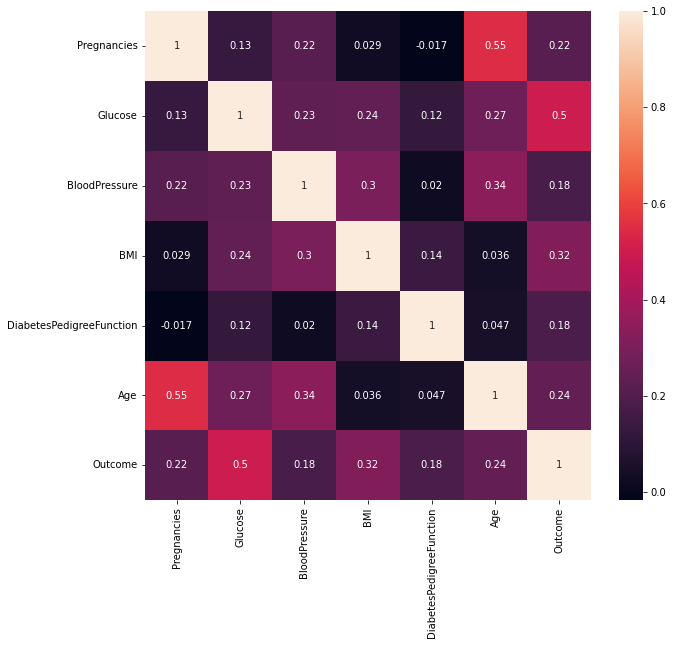

In [21]:
plt.figure(figsize=(10,9))
sbn.heatmap(data_impute.corr(), annot=True)
plt.show()

Pregnancies and DiabetesPedigreeFunction are -vely correlated. Glucose is strongly correlated with outcome.

Data Modeling:

1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process. 
Suppose the model predicts diabetics as nondiabetic, then the model doesn't perform well, which means we need to improve the recall of the model.

So, I chose "recall" as the best validation. because it gives a proportion of actual positive identified. Based on recall value I choose the model.

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV
from xgboost import XGBClassifier
import warnings

In [23]:
X = data_impute.drop('Outcome', axis=1)
y = data_impute['Outcome']

In [24]:
from collections import Counter
features, target=SMOTE().fit_resample(X, y)
Counter(target)

Counter({1: 500, 0: 500})

2. Apply an appropriate classification algorithm to build a model.
I choose Random Forest Classifier. Because it is Powerful and accurate, good performance on many problems, including non linear

In [25]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 6), (200, 6), (800,), (200,))

In [26]:
#1. Random Forest
k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=10)
params = {'n_estimators':[100, 200, 300, 500, 700], 'max_depth':[5,10,15]}
grid = GridSearchCV(RandomForestClassifier(class_weight ="balanced"), param_grid=params, cv=k_fold, scoring='recall', n_jobs=-1, verbose=1)
grid.fit(x_train, y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=10, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [100, 200, 300, 500, 700]},
             scoring='recall', verbose=1)

In [27]:
grid.best_params_

{'max_depth': 10, 'n_estimators': 200}

In [42]:
rf = RandomForestClassifier(n_estimators=200, class_weight ="balanced", max_depth=10)
result = rf.fit(x_train, y_train)
rf_pred = result.predict(x_test)

3. Compare various models with the results from KNN algorithm.

In [29]:
#2. KNN
params = {'n_neighbors':[5,9,13,15,19, 21], 'leaf_size':[10, 20,30, 40]}
grid = GridSearchCV(KNeighborsClassifier(n_neighbors=5), param_grid=params, cv=k_fold, scoring='recall', n_jobs=-1, verbose=1)
grid.fit(x_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=10, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [10, 20, 30, 40],
                         'n_neighbors': [5, 9, 13, 15, 19, 21]},
             scoring='recall', verbose=1)

In [30]:
grid.best_params_

{'leaf_size': 10, 'n_neighbors': 5}

In [43]:
knn = KNeighborsClassifier(n_neighbors=5, leaf_size=10)
result = knn.fit(x_train, y_train)
knn_pred = result.predict(x_test)

In [32]:
#3. SVC
params = {'C':[0.1, 0.01, 0.22, 0.3], 'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'degree':[1,3,4,5]}
grid = GridSearchCV(SVC(class_weight ="balanced"), param_grid=params, cv=k_fold, scoring='recall', n_jobs=-1, verbose=1)
grid.fit(x_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=10, shuffle=True),
             estimator=SVC(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [0.1, 0.01, 0.22, 0.3], 'degree': [1, 3, 4, 5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='recall', verbose=1)

In [33]:
grid.best_params_

{'C': 0.3, 'degree': 1, 'kernel': 'linear'}

In [44]:
svc = SVC(class_weight ="balanced", C=0.3, degree=1, kernel='linear')
result = svc.fit(x_train, y_train)
svc_pred = result.predict(x_test)

In [35]:
#4. xgboost
params = {'n_estimators':[100, 200, 300], 'max_depth':[4,5,6], 'learning_rate':[0.01, 0.03, 0.05]}
grid = GridSearchCV(XGBClassifier(objective='binary:logistic', eval_metric='error'), param_grid=params, cv=k_fold, scoring='recall', n_jobs=-1, verbose=1)
warnings.filterwarnings('ignore')
grid.fit(x_train, y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=10, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False,
                                     eval_metric='error', gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                            

In [36]:
grid.best_params_

{'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 200}

In [45]:
xgb = XGBClassifier(objective='binary:logistic', eval_metric='error', n_estimators=200, max_depth=6, learning_rate=0.01)
warnings.filterwarnings('ignore')
result = xgb.fit(x_train, y_train)
xgb_pred = result.predict(x_test)

In [46]:
#Cross Validation
model_factory = [rf, knn, svc, xgb]
for model in model_factory:
    warnings.filterwarnings('ignore')
    scores=cross_val_score(model, features, target, cv=k_fold, scoring='recall')
    print(model.__class__.__name__, ':', np.mean(scores))

RandomForestClassifier : 0.8540000000000001
KNeighborsClassifier : 0.852
SVC : 0.726
XGBClassifier : 0.8280000000000001


In [47]:
from sklearn.metrics import classification_report, RocCurveDisplay, roc_curve, auc, recall_score
model_pred = [rf_pred, knn_pred, svc_pred, xgb_pred]
model_factory = [rf, knn, svc, xgb]
for pred, model in zip(model_pred, model_factory):
    warnings.filterwarnings('ignore')
    score=recall_score(y_test, pred)
    print(model.__class__.__name__, ':', score)

RandomForestClassifier : 0.8785046728971962
KNeighborsClassifier : 0.8598130841121495
SVC : 0.7570093457943925
XGBClassifier : 0.8130841121495327


4. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. for XGB classifier.

In [48]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.81      0.71      0.76        93
           1       0.77      0.86      0.81       107

    accuracy                           0.79       200
   macro avg       0.79      0.78      0.79       200
weighted avg       0.79      0.79      0.79       200



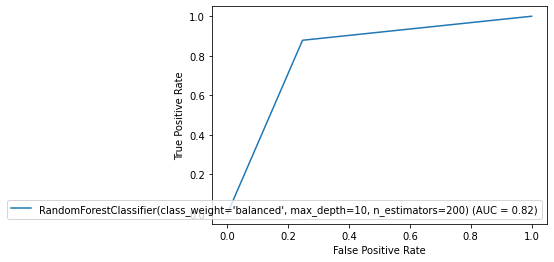

In [49]:
fpr, tpr, thresholds = roc_curve(y_test, rf_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=rf)
display.plot()
plt.show()

Data Reporting:

5. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:
https://public.tableau.com/app/profile/diana.laveena.dsouza/viz/health_Projects/HealthAnalysis?publish=yes
    